<a href="https://colab.research.google.com/github/sanju-k-maurya/DIP/blob/main/adaptive_filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

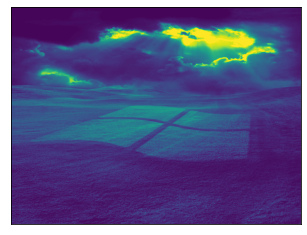

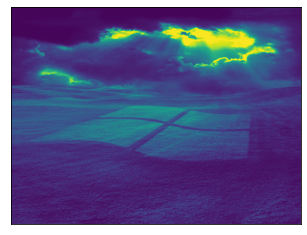

In [11]:
img = cv.imread('window.jpg', 0)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

img_copy = np.copy(img)

# Add gaussian noise with mean 0 and variance 0.59
noise = np.random.normal(0, .59, img_copy.shape)
noisy_img = img_copy + noise

plt.imshow(noisy_img)
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#Function to convert rgb to grayscale
def rgb2gray(image_rgb):
    if(len(image_rgb.shape) == 3):
        return np.uint8(np.dot(image_rgb[...,:3], [0.2989, 0.5870, 0.1140]))

    return image_rgb

# Adaptive mean filter:
def ad_mean_f(image, window_size):
    """runs the Adaptive Mean Filter proess on an image"""
    xlength, ylength = image.shape #get the shape of the image.
    
    S_xy = window_size
    
    output_image = image.copy()
    
    for row in range(S_xy, xlength-S_xy-1):
        for col in range(S_xy, ylength-S_xy-1):
             filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1] # filter window
             target = filter_window.reshape(-1) # make 1-dimensional
             var_l = np.var(target)   # local variance
             mean_l = np.mean(target) # local mean
             var_n = np.var(noise)      # variance of noise 
             curr = image[row,col]      # current intensity
             if (var_l != 0):         # exception for local variance = 0
                 new_intensity = curr-var_n/var_l*(curr-mean_l)
             else:
                 new_intensity = curr
             output_image[row, col] = new_intensity
    return output_image

# image = np.array(noisy_img)
# grayscale_image = rgb2gray(image)

output = ad_mean_f(img, 3)
plt.imshow(output)
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
# Adaptive median Filter

def find_median(array):
    """Return the median of 1-d array"""
    sorted_array = np.sort(array) 
    median = sorted_array[len(array)//2]
    return median

def stage_A(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_med < z_max):
        return stage_B(z_min, z_med, z_max, z_xy, S_xy, S_max)
    else:
        S_xy += 2 #increase the size of S_xy to the next odd value.
        if(S_xy <= S_max): #repeat process
            return stage_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
        else:
            return z_med

def stage_B(z_min, z_med, z_max, z_xy, S_xy, S_max):
    if(z_min < z_xy < z_max):
        return z_xy
    else:
        return z_med

def amf(image, initial_window, max_window):
    """runs the Adaptive Median Filter proess on an image"""
    xlength, ylength = image.shape # get the shape of the image.
    
    z_min, z_med, z_max, z_xy = 0, 0, 0, 0
    S_max = max_window
    S_xy = initial_window # dynamically to grow
    
    output_image = image.copy()
    
    for row in range(S_xy, xlength-S_xy-1):
        for col in range(S_xy, ylength-S_xy-1):
            filter_window = image[row - S_xy : row + S_xy + 1, col - S_xy : col + S_xy + 1] # filter window
            target = filter_window.reshape(-1) # make 1-dimensional
            z_min = np.min(target) # min of intensity values
            z_max = np.max(target) # max of intensity values
            z_med = find_median(target) # median of intensity values
            z_xy = image[row, col] # current intensity
            
           
            new_intensity = stage_A(z_min, z_med, z_max, z_xy, S_xy, S_max)
            output_image[row, col] = new_intensity
    return output_image

output = amf(grayscale_image, 3, 11)
plt.imshow(output)
plt.xticks([]), plt.yticks([])
plt.show()